Consider the map $G(x,y)$ given by  $$x_1 = x + y_1,$$ $$y_1 = y + kx(x-1).$$ 
This map has fixed points $\bar{x} = (1,0)$ and $\bar{x}_2 = (0,0)$. In this assignment, we compute the linearized approximation to the stable and unstable manifolds of the fixed point $\bar{x}$.

The Jacobian of the map is given by $$ J = \begin{bmatrix} 1+k & 1 \\ k & 1 \end{bmatrix}.$$  It is given in the code below with $k$ set to a positive value.   


In [426]:
k = 1.5; 

J = [1+k  1 ; k 1]

2×2 Array{Float64,2}:
 2.5  1.0
 1.5  1.0

We can find the eigenvalues of $J$ easily enough by hand. They are $$\lambda_1, \lambda_2 = \frac{(k+2 \pm \sqrt{k^2 + 4k})}{2},$$

and the eigendirections are given by $y = -k \pm \sqrt{k^2 + 4k}(x - 1)/2$.

Note that both eigenvalues are positive when $k > 0$, since $(k+2)^2 > k^2 + 4k$. One eigenvalue is of magnitude $> 1$, and one is of magnitude $< 1$. We can conclude from this that $\bar{x}$ is a saddle node associated with one stable and one unstable manifold. 

Below, we find the specific eigenvalues given the parameter $k$, as well as the associated eigenvectors.  

In [427]:
(vals, V) = eig(J)


([3.18614,0.313859],
[0.824565 -0.415974; 0.565767 0.909377])

In [428]:
lam1 = (k + 2 + sqrt(k^2 + 4*k) )/2; lam2 = (k + 2 -sqrt(k^2 + 4*k) )/2;
norm( [lam1, lam2] - vals)

0.0

Since both eigenvalues of  $\bar{x}$ are positive (i.e., nonzero), we can use the eigenvectors of $J$ as an approximation to the stable and unstable manifolds associated with $\bar{x}$, as long as we do not stray very far from $\bar{x}$. We begin by defining a set of points in the stable and unstable eigendirections on a small interval around $\bar{x}$. 

In [429]:
idx = linspace(0, .0001, 100); #small interval, 100 points.
fp = [1,0]; #fixed point
forwardUS = zeros(100,2);
backwardUS = zeros(100,2); 
forwardS = zeros(100,2); 
backwardS = zeros(100,2); 

In [455]:
for j = 1:100
    forwardUS[j,:] = fp' + idx[j]*V[:,1]';#fixed pnt + interval*unstable_eigendirection
    backwardUS[j,:] = fp' - idx[j]*V[:,1]';#fixed pnt - interval*unstable_eigendirection
    forwardS[j,:] = fp' + idx[j]*V[:,2]';#fixed pnt + interval*stable_eigendirection
    backwardS[j,:] = fp' - idx[j]*V[:,2]';#fixed pnt - interval*stable_eigendirection
end

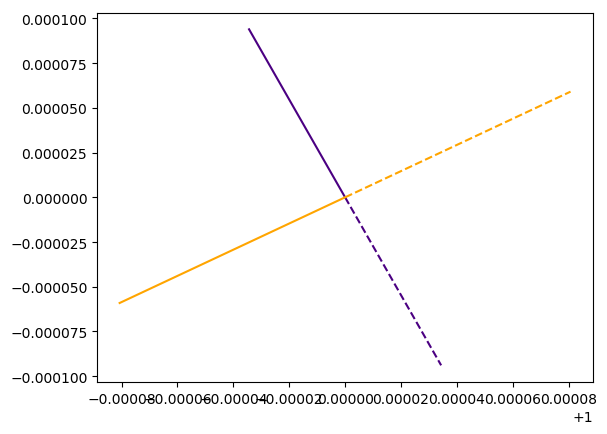

In [457]:
using PyPlot

plot(backwardS[:,1], backwardS[:,2], linestyle = "--",  color = "indigo" );
plot(forwardS[:,1], forwardS[:,2],linestyle = "-",  color = "indigo" );
plot(backwardUS[:,1], backwardUS[:,2] ,linestyle = "-",  color = "orange" );
plot(forwardUS[:,1], forwardUS[:,2], linestyle = "--",  color = "orange" );



Using the map $G$ and the inverse of $G$, we can iterate the points we have generated on the approximate manifolds. We will move forward in time from the fixed point on the unstable manifold (orange) and backward in time on the stable manifold (indigo). To see the behavoir, we iterate the discrete subset of points used to generate the solid lines in the above plot.  We plot the iterates as they are computed and observe that a homoclinic tangle is produced. The fixed points $\bar{x} = (1,0)$ and $\bar{x}_2 = (0,0)$ are included in our plots. 


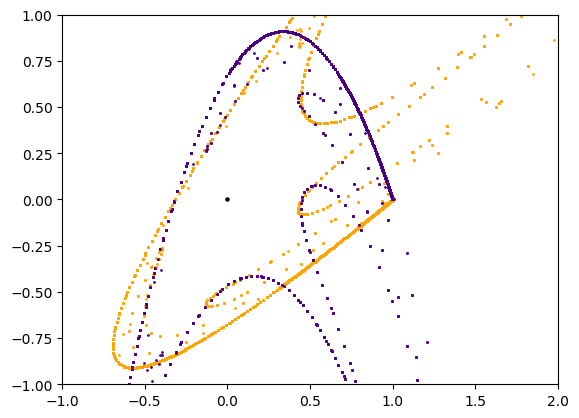

In [459]:
# compute iterations of points on the manifolds: 

Stablefx = zeros(100, 15);
Stablefy = zeros(100, 15);
UStablefx = zeros(100, 15);
UStablefy = zeros(100, 15);

Stablefx[:,1] = forwardS[:,1];
Stablefy[:,1] = forwardS[:,2];
UStablefx[:,1] = backwardUS[:,1];
UStablefy[:,1] = backwardUS[:,2];

clf
fig = figure()
using PyPlot  #plot the fixed points
scatter(fp[1,:], fp[2,:], s = 5, c="k")
scatter(0, 0, s = 5, c="k")
xlim(-1, 2)
ylim(-1,1)

for j = 2:15
    # use G to iterate points on the unstable manifold. 
    UStablefx[:,j] = UStablefx[:,j-1] + UStablefy[:,j-1] + k*UStablefx[:,j-1].*(UStablefx[:,j-1]-1); 
    UStablefy[:,j] = UStablefy[:,j-1] + k*UStablefx[:,j-1].*(UStablefx[:,j-1]-1); 
    
    # use inv(G) to iterate points on the stable manifold. 
    Stablefx[:, j] = Stablefx[:,j-1] - Stablefy[:, j-1]; 
    Stablefy[:,j] = Stablefy[:,j-1] - k*Stablefx[:,j].*(Stablefx[:,j]-1);
    USplotx = UStablefx[:,1:j];
    USploty = UStablefy[:,1:j];
    Splotx = Stablefx[:, 1:j];
    Sploty = Stablefy[:, 1:j];
     scatter(USplotx[:], USploty[:], s=1, c="orange")
     scatter(Splotx[:], Sploty[:], s=1, c="indigo")
    display(fig)    
     IJulia.clear_output(true)
end
    
    

In the next animation, we look at what happens as the parameter $k$ is varied. 

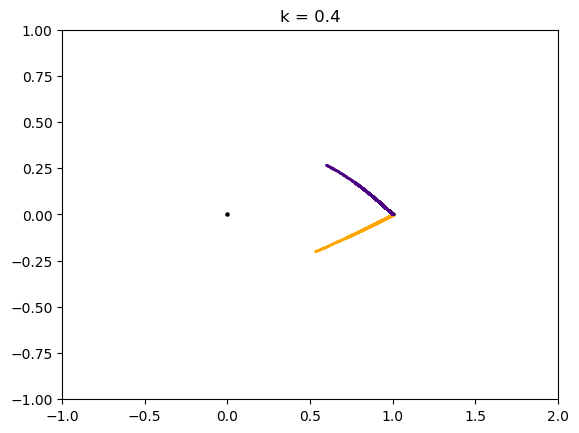

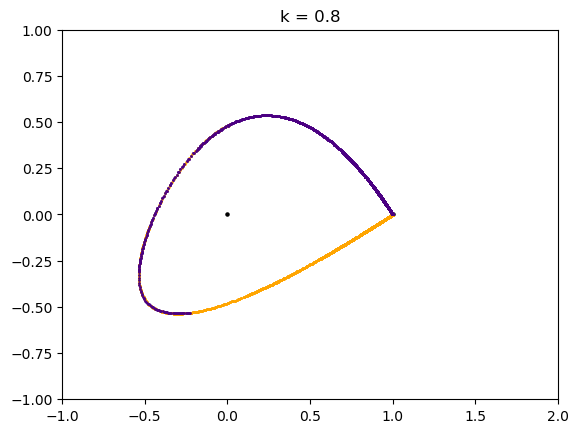

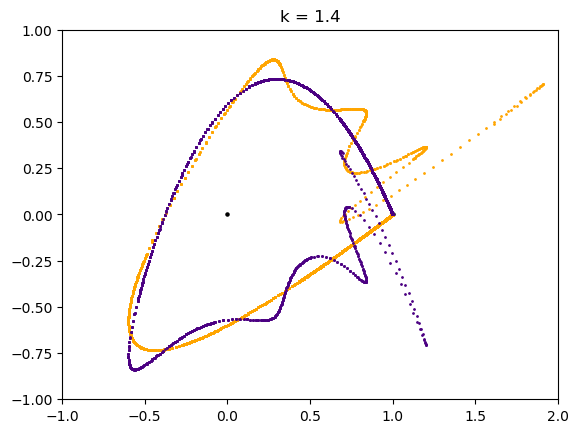

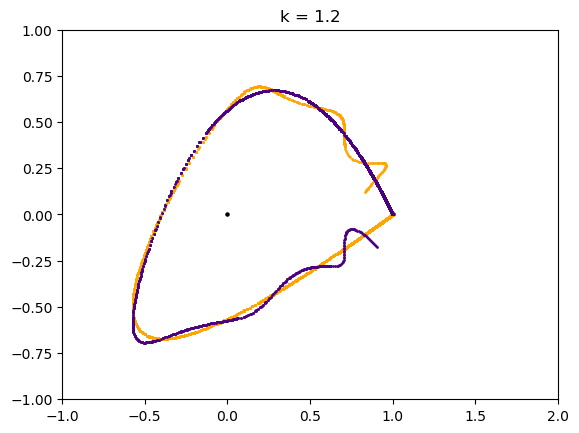

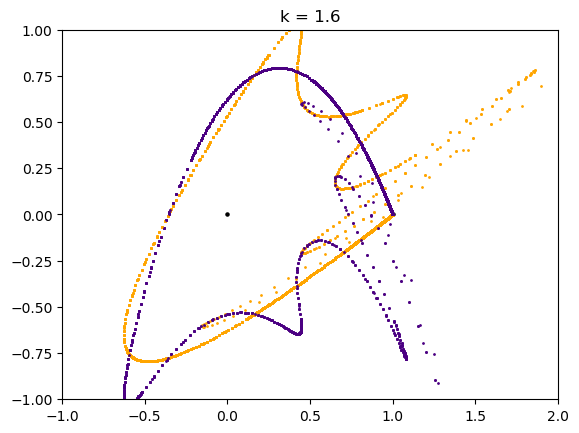

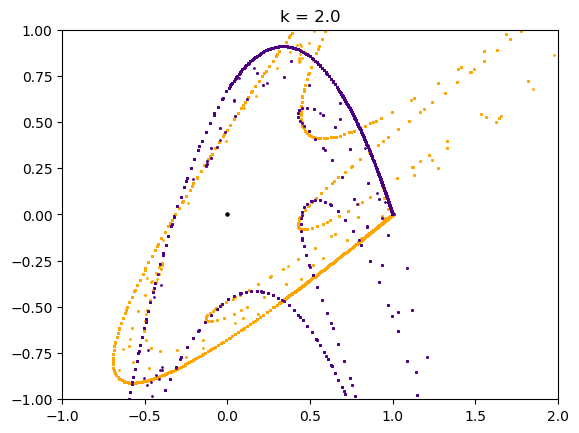

In [461]:
 

kvals = [.4, .8, 1.4, 1.2, 1.6, 2];

for i = 1:length(kvals)

k = kvals[i]; #assign k
    
#use eigenvectors of Jacobian to generate points on linearization of stable and unstable manifolds   
J = [1+k  1 ; k 1] 
(vals, V) = eig(J)
forwardUS = zeros(100,2);
backwardUS = zeros(100,2); 
forwardS = zeros(100,2); 
backwardS = zeros(100,2); 

for p = 1:100
    #forwardUS[p,:] = fp' + idx[j]*V[:,1]';#fixed pnt + interval*unstable_eigendirection
    backwardUS[p,:] = fp' - idx[p]*V[:,1]';#fixed pnt - interval*unstable_eigendirection
    forwardS[p,:] = fp' + idx[p]*V[:,2]';#fixed pnt + interval*stable_eigendirection
    #backwardS[p,:] = fp' - idx[j]*V[:,2]';#fixed pnt - interval*stable_eigendirection
end
    
#iterate point set and plot results
    
Stablefx = zeros(100, 15);
Stablefy = zeros(100, 15);
UStablefx = zeros(100, 15);
UStablefy = zeros(100, 15);

Stablefx[:,1] = forwardS[:,1];
Stablefy[:,1] = forwardS[:,2];
UStablefx[:,1] = backwardUS[:,1];
UStablefy[:,1] = backwardUS[:,2];

clf
fig = figure()
using PyPlot  #plot the fixed points
title("k = $k" )
scatter(fp[1,:], fp[2,:], s = 5, c="k")
scatter(0, 0, s = 5, c="k")
xlim(-1, 2)
ylim(-1,1)

for j = 2:15
    # use G to iterate points on the unstable manifold. 
    UStablefx[:,j] = UStablefx[:,j-1] + UStablefy[:,j-1] + k*UStablefx[:,j-1].*(UStablefx[:,j-1]-1); 
    UStablefy[:,j] = UStablefy[:,j-1] + k*UStablefx[:,j-1].*(UStablefx[:,j-1]-1); 
    
    # use inv(G) to iterate points on the stable manifold. 
    Stablefx[:, j] = Stablefx[:,j-1] - Stablefy[:, j-1]; 
    Stablefy[:,j] = Stablefy[:,j-1] - k*Stablefx[:,j].*(Stablefx[:,j]-1);
    USplotx = UStablefx[:,1:j];
    USploty = UStablefy[:,1:j];
    Splotx = Stablefx[:, 1:j];
    Sploty = Stablefy[:, 1:j];
     scatter(USplotx[:], USploty[:], s=1, c="orange")
     scatter(Splotx[:], Sploty[:], s=1, c="indigo")
    display(fig)    
    IJulia.clear_output(true)
end
    
end
